In [ ]:
#conda install -c simpleitk simpleitk 

In [61]:
import SimpleITK as sitk
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
def im2arr(x):
    return sitk.GetArrayFromImage(sitk.ReadImage(x))

In [63]:
datadir= "data"
files = sorted(glob.glob(datadir+"/*.mha"))

In [64]:
im = im2arr(files[0])  #im becomes a numpy array
im.shape

(2381, 256, 256)

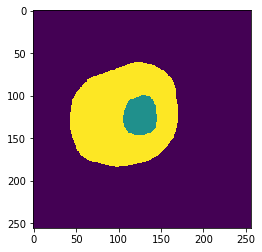

In [65]:
plt.imshow(im[2380])

In [70]:
def sample_stack(stack, rows=5, cols=5, start_with=10, show_every=3):
    fig,ax = plt.subplots(rows,cols,figsize=[12,12])
    for i in range(rows*cols):
        ind = start_with + i*show_every
        ax[int(i/rows),int(i % rows)].set_title('slice %d' % ind)
        ax[int(i/rows),int(i % rows)].imshow(stack[ind])
        ax[int(i/rows),int(i % rows)].axis('off')
    plt.show()

IndexError: index 2410 is out of bounds for axis 0 with size 2381

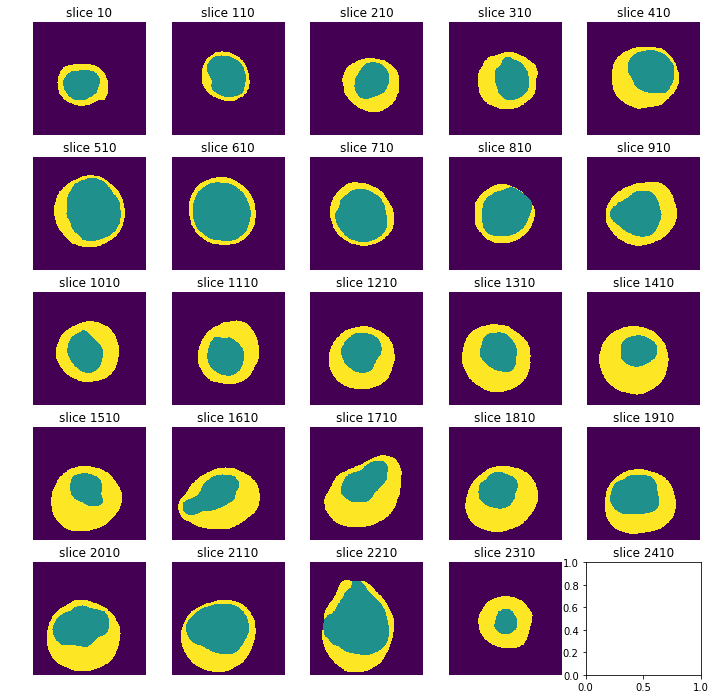

In [71]:
sample_stack(im, show_every=100)

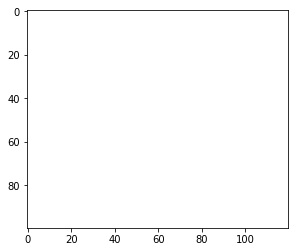

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()